## Intro to Regression

[intro desmos](https://www.desmos.com/calculator/ywloazwete)

Goals:
- use statsmodels to build a regression model
- use summary statistics to evaluate a model
- differentiate between corr, cov, and R squared

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

`.cov` , `.corr`

[link to dataset](https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv)

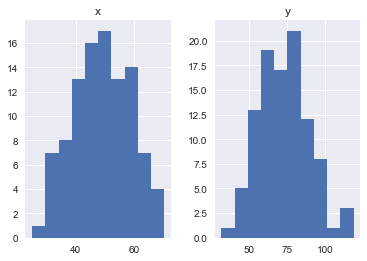

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv', header=None)
df = df.rename(columns = {0:'x', 1:'y'})
df.hist()
plt.show()

In [25]:
df.corr() # returns the correlation coefficients

,x,y
x,1.000000,0.773728
y,0.773728,1.000000


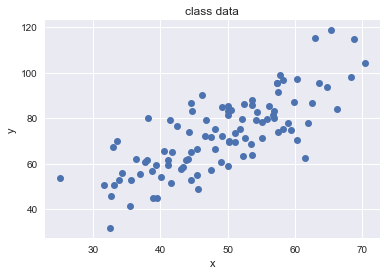

In [28]:
plt.plot(df.x,df.y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('class data')
plt.show()

In [42]:
f = 'y~x'

In [43]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.86e-21
Time:                        14:56:50   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9910      5.459      1.464      0.146      -2.842      18.824
x              1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Beginner
### Problem One: Chopsticks
#### Is chopstick length correlated with effectiveness?

In [ ]:
chopsticks = pd.read_csv("http://blog.yhat.com/static/misc/data/chopstick-effectiveness.csv")

In [ ]:
chopsticks.head()

[Link to chopsticks study](https://www.ncbi.nlm.nih.gov/pubmed/15676839)

## Intermediate:
### Problem Three: Street price of weed
[reference](http://blog.yhat.com/posts/7-funny-datasets.html)

Has the price of weed been trending downward or upward over time? 
- overall?
- different in certain states?
- different qualities?

In [50]:
weed = pd.read_csv("http://blog.yhat.com/static/misc/data/marijuana-street-price-clean.csv")

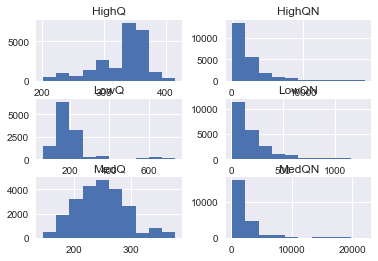

In [49]:
weed.hist()
plt.show()

In [64]:
weed.columns

Index(['State', 'HighQ', 'HighQN', 'MedQ', 'MedQN', 'LowQ', 'LowQN', 'date'], dtype='object')

In [78]:
from datetime import datetime
weed['date'] = [pd.to_datetime(x) for x in weed['date']]
state_list = weed['State'].unique()
state_list

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [93]:
params = pd.DataFrame(columns=state_list)
rsquared = pd.DataFrame(columns=state_list)
for st in state_list:
    f = 'HighQ~date'
    results = ols(formula=f, data=weed[weed['State']==st]).fit()
    params[st] = results.params
    rsquared[st] = results.rsquared

In [90]:
params

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Intercept,3.396500e+02,2.887500e+02,3.035200e+02,3.617800e+02,248.77,2.361900e+02,3.482100e+02,3.739600e+02,3.522000e+02,3.065900e+02,...,3.878000e+02,3.592200e+02,3.434100e+02,2.919400e+02,3.798800e+02,374.23,2.362800e+02,3.609800e+02,3.575600e+02,3.559000e+02
date[T.Timestamp('2013-12-28 00:00:00')],1.932676e-12,1.421085e-12,1.705303e-12,1.989520e-12,-0.03,1.193712e-12,1.989520e-12,1.989520e-12,1.875833e-12,1.762146e-12,...,2.387424e-12,2.046363e-12,1.932676e-12,1.591616e-12,2.103206e-12,0.01,1.250555e-12,1.989520e-12,2.046363e-12,2.216893e-12
date[T.Timestamp('2013-12-29 00:00:00')],1.000000e-01,1.141610e-12,-6.000000e-02,1.267552e-12,-0.01,4.000000e-02,-1.400000e-01,3.500000e-01,6.000000e-02,-8.000000e-02,...,1.250801e-12,4.800000e-01,-2.000000e-02,-4.000000e-01,1.381601e-12,-0.28,-2.000000e-02,1.260847e-12,6.000000e-02,1.140901e-12
date[T.Timestamp('2013-12-30 00:00:00')],1.000000e-01,3.865352e-12,-6.000000e-02,7.000000e-02,0.05,2.000000e-02,1.000000e-02,3.500000e-01,6.000000e-02,-1.200000e-01,...,5.059064e-12,4.800000e-01,-6.000000e-02,-4.000000e-01,5.059064e-12,-0.12,-5.000000e-02,4.774847e-12,1.400000e-01,4.604317e-12
date[T.Timestamp('2013-12-31 00:00:00')],-2.300000e-01,-1.021302e-12,-1.900000e-01,7.000000e-02,-0.01,1.400000e-01,-1.700000e-01,3.500000e-01,6.000000e-02,-1.600000e-01,...,-1.289193e-12,5.300000e-01,-7.000000e-02,-4.000000e-01,-1.259227e-12,-0.25,-1.500000e-01,-1.242920e-12,2.700000e-01,-1.080809e-12
date[T.Timestamp('2014-01-01 00:00:00')],-5.900000e-01,-1.477929e-12,-2.100000e-01,7.000000e-02,0.01,1.200000e-01,-3.100000e-01,-7.800000e-01,6.000000e-02,-1.600000e-01,...,-1.080025e-12,5.300000e-01,-8.000000e-02,-4.000000e-01,-1.364242e-12,-0.22,-2.500000e-01,-1.800000e-01,4.300000e-01,-1.080025e-12
date[T.Timestamp('2014-01-02 00:00:00')],-4.500000e-01,9.200000e-01,-1.600000e-01,7.000000e-02,-0.10,1.000000e-02,-3.700000e-01,-7.800000e-01,-1.800000e-01,-2.400000e-01,...,1.241594e-12,5.300000e-01,-6.000000e-02,-2.400000e-01,1.452268e-12,-0.61,-1.500000e-01,-1.180000e+00,6.300000e-01,1.043423e-12
date[T.Timestamp('2014-01-03 00:00:00')],-4.500000e-01,3.900000e-01,-2.100000e-01,-4.100000e-01,-0.10,1.200000e-01,-3.200000e-01,-7.800000e-01,-8.000000e-01,-3.800000e-01,...,-5.684342e-14,6.200000e-01,-1.500000e-01,-3.300000e-01,-1.200000e-01,-0.46,-2.500000e-01,-2.600000e-01,5.200000e-01,-1.870000e+00
date[T.Timestamp('2014-01-04 00:00:00')],-4.500000e-01,3.900000e-01,-3.000000e-01,-5.700000e-01,-0.12,-1.200000e-01,-3.200000e-01,-6.100000e-01,-8.000000e-01,-4.800000e-01,...,-5.684342e-14,5.200000e-01,-1.800000e-01,-1.600000e-01,-1.200000e-01,-0.51,-2.500000e-01,1.300000e-01,4.800000e-01,-1.870000e+00
date[T.Timestamp('2014-01-05 00:00:00')],-3.300000e-01,3.900000e-01,-3.000000e-01,-5.700000e-01,-0.09,-5.000000e-02,-4.200000e-01,-6.100000e-01,-2.000000e-02,-4.700000e-01,...,3.074209e-12,4.600000e-01,-2.700000e-01,-3.800000e-01,-1.200000e-01,-0.46,-3.100000e-01,1.300000e-01,6.200000e-01,-1.870000e+00


In [94]:
rsquared

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


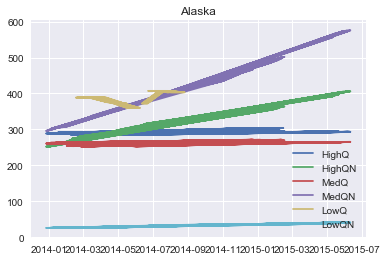

In [95]:
st = state_list[1]
for col in weed.columns[1:-1]:
    plt.plot(weed[weed['State']==st].date, weed[weed['State']==st][col], label=col)
    plt.title(st)
    plt.legend()

## Advanced
### DC housing
### Doing repeat OLS, which variables are related to housing price?

In [44]:
housing = pd.read_csv("https://drive.google.com/uc?export=download&id=1DsbpIf4_9CAKNd-B9gaML1WKOJcMne71")

C:\Users\Michelle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
housing.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
